In [1]:
import pandas as pd
import numpy as np


In [2]:
path=r'C:/Users/arshi/Downloads/bhp.csv'
# file_path = r'C:/Users/arshi/Downloads/bhp.csv'

data=pd.read_csv(path)
data.head()
# data.info()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
print(data.columns)

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')


In [4]:
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))
# data['bhk']

In [5]:
# Calculate the 1st and 99th percentile values for 'price_per_sqft'
lower_limit = data['price_per_sqft'].quantile(0.01)
upper_limit = data['price_per_sqft'].quantile(0.99)

# Filter out outliers
data = data[(data['price_per_sqft'] >= lower_limit) & 
            (data['price_per_sqft'] <= upper_limit)]

In [6]:
print(data.isnull().sum()) 

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [7]:
data = data.dropna()

In [8]:
### the Cleaned Data
print(data.head())
print(data.info())

                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12941 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        12941 non-null  object 
 1   size            12941 non-null  object 
 2   total_sqft      12941 non-null  float64
 3   bath            12941 non-null  float64
 4   price           12941 non-null  float64
 5   bhk          

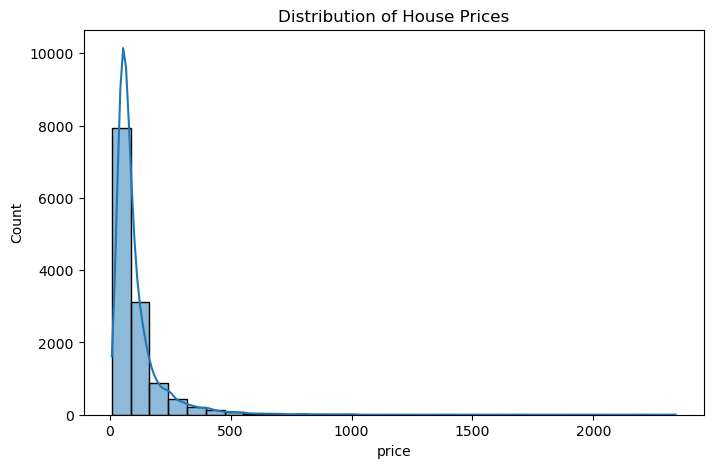

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Distribution of the Target Variable 'price'
plt.figure(figsize=(8, 5))
sns.histplot(data['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.show()

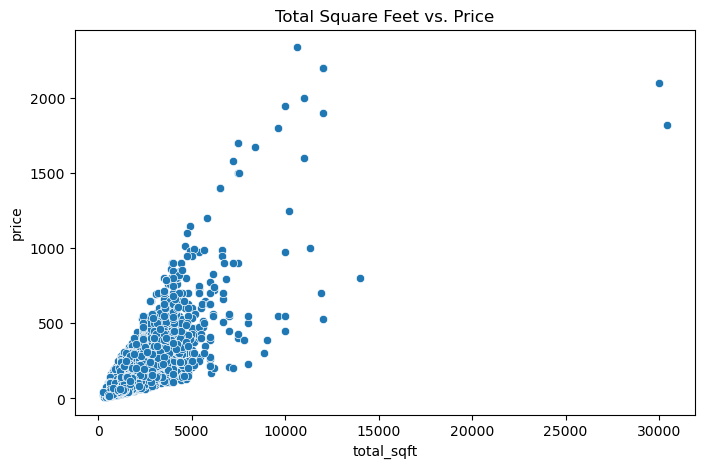

In [10]:
# Scatter Plot - Total Square Feet vs. Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['total_sqft'], y=data['price'])
plt.title('Total Square Feet vs. Price')
plt.show()

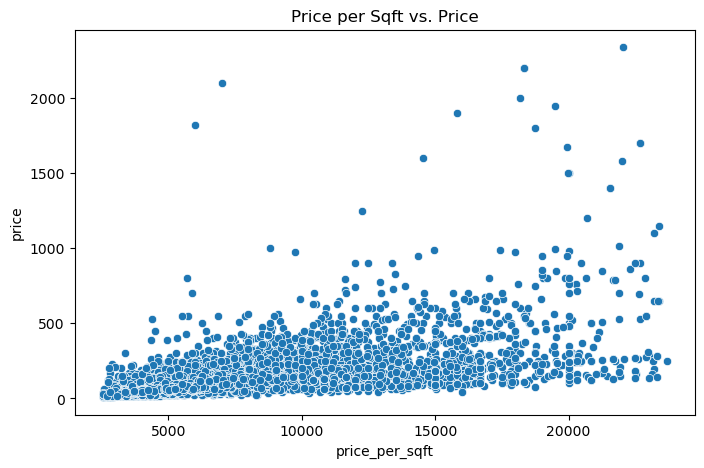

In [11]:
# Scatter Plot - Price per Sqft vs. Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['price_per_sqft'], y=data['price'])
plt.title('Price per Sqft vs. Price')
plt.show()

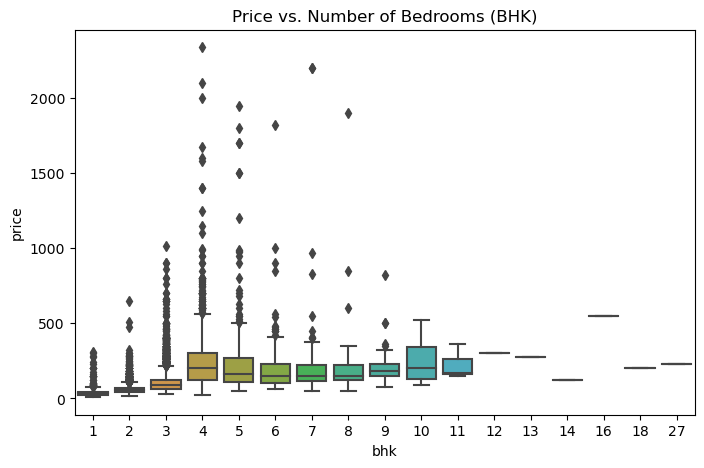

In [12]:
# Box Plot - Price by Number of Bedrooms (BHK)
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['bhk'], y=data['price'])
plt.title('Price vs. Number of Bedrooms (BHK)')
plt.show()

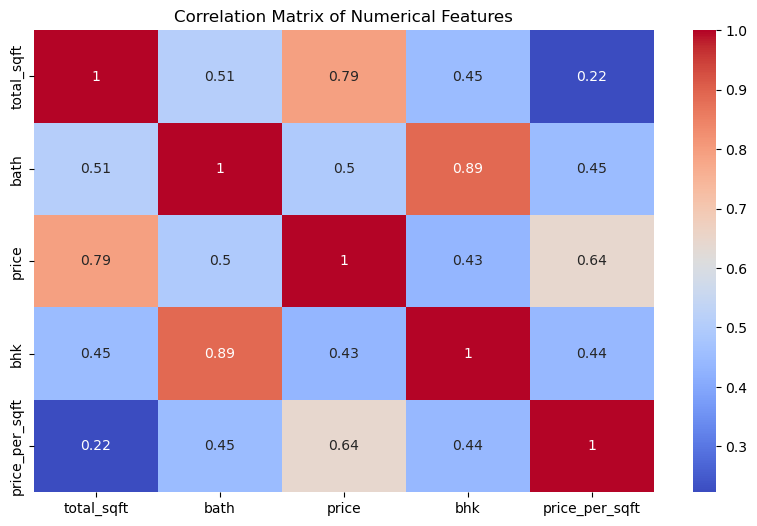

In [13]:
# Correlation Matrix for Numerical Features
plt.figure(figsize=(10, 6))
corr_matrix = data[['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

#  Define Features and Target
X = data[['total_sqft', 'bath', 'bhk']]
y = data['price']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the Split
print(f'Training set size: {X_train.shape}')
print(f'Testing set size: {X_test.shape}')

Training set size: (10352, 3)
Testing set size: (2589, 3)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [32]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [33]:
# Evaluate Model Performance
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}')
print(f'R-squared Score: {r2_score(y_test, y_pred):.2f}')

Mean Absolute Error (MAE): 36.68
Mean Squared Error (MSE): 4345.83
R-squared Score: 0.66


In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
dt_model=DecisionTreeRegressor()
dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [36]:
y_pred_dt=dt_model.predict(X_test)

In [37]:
print("Decision Tree Regressor Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dt):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dt):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_dt):.2f}")

Decision Tree Regressor Performance:
MAE: 35.22
MSE: 7558.08
R² Score: 0.41


In [40]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Regressor Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.2f}")


Random Forest Regressor Performance:
MAE: 32.07
MSE: 5611.14
R² Score: 0.56
